## A Primer on Quantitative Strategy Development
For more information, please visit: https://blueshift.quantinsti.com/docs/quants/#some-definitions

### Some definitions
- **Systematic Trading**: Trading decisions in a methodical way defining trading goals, risk controls and rules

- **Quantitative Trading**: Trading signal generation based on quantitative analysis

- **Algorithmic Trading**: Execution of trades using automated pre-programmed trading instructions

- **Hi-Frequency Trading**: Algorithmic trading characterized by high speed, high turn-over rates and high order-to-trade ratios

### What is a trading strategy
**Strategy**: A set of rules or a well-defined algorithm to choose an action from the set of all possible actions in any state of a game.

**Trading Strategy**: Strategy (above). The game is stochastic (state transitions are probabilistic), massively multi-player and potentially long running.

From a practical point of view, a trading strategy is nothing but an algorithm that takes in as input a set of data (like asset prices, state of the economy, fundamental ratios etc.) that captures the relevant subset of the current state of the world, and generates a series of orders.

### The strategy spectrum
Trading strategies are diverse. But one way to look at it is from the point of view of trading style and the underlying factor that guides the profit or loss of the strategy. See below:



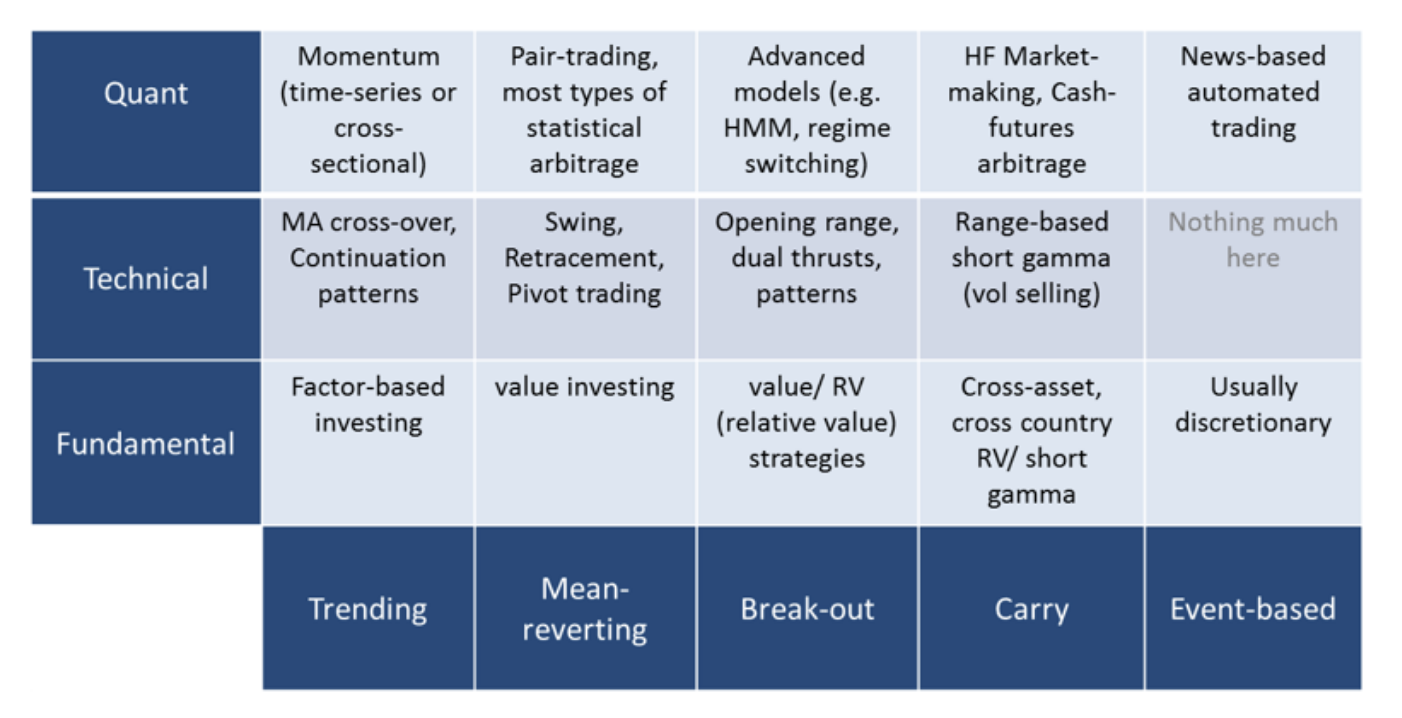

Here we capture the trading styles in the vertical axis and the profit driver on the horizontal axis. Different styles try to capture the same underlying driver in different manner. For example, `value investing` for a fundamental investor, or `swing trading` of a technical trader or `statistical arbitrage` of a quant trader - all focus on the same underlying driver - `mean reversion`. For the value investors, it is deviation from the `fair price`. For technical traders it is from the technical levels or `support and resistance`. For quant traders it is from the modeled behaviour of relative price of two assets.

If you look closely, you will notice that almost all strategies can be adapted for a systematic approach.

### Fundamental vs quant trading
#### Tale of two styles


Let's understand the difference between fundamental vs. quantitative approach of investing through an example:

Asset manager A is a discretionary manager and follows 10 stocks diligently. Asset manager B is a systematic manager and has enough computational power to track 500 stocks. Investors seek outperformance and certainty.

- **Question #1**: What is the hit ratio for A to achieve outperformance in at least 50% (total 5 stocks) of his portfolio with at least 95% probability?
- **Question #2**: What is the hit ratio for B to achieve outperformance in at least 50% (total 250 stocks) of his portfolio with at least 95% probability?

**Solution**: Let the success rate (or hit ratio) be $p$. Total required success $n$, total trial $N$. Probability of $n$ success out of $N$ trials follows the binomial distribution:

$$Pr(n|N,p)=^NC_n.p^n.(1−p)^{N−n}$$

Probability of at least n success ($n$ = 5 for A, $n$ = 250 for B): 

$$P = 1 − \sum^{n}_{i=0}Pr(i|N,p)$$

We need to solve for p for A and B, such that P is 0.95 in both cases. The result, once plotted, looks like below:


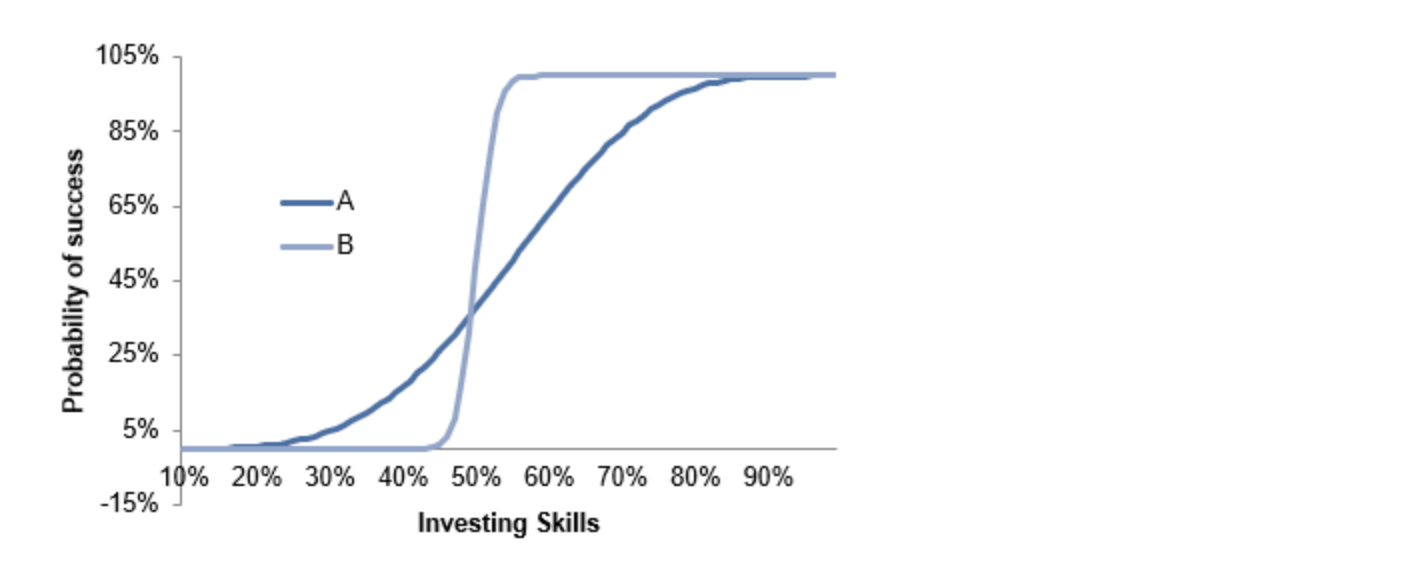

We see that the asking skill level or hit ratio for B is much lower than A. B has to be right only around 55% of times, whereas for A, the accuracy needs to be more than 80% - which is no mean feat! This brings us to the most important concept of investment - the fundamental principle.

### Fundamental law of active management
The fundamental law of active management states:

$$IR=IC.\sqrt{N}.TC$$
**Information Ratio (IR)**: Measure of success – risk adjusted returns over the chosen benchmark\
**Information Coefficient (IC)**:Linear relationship between predicted asset returns and realized returns, usually in the range of 0 to 1 (unlike correlation range of -1 to 1, as you can always short the prediction of someone who is consistently wrong!!).\
**Number of Bets (N)**: Number of independent bets that can be made in a given time-frame.\
**Transfer Coefficient (TC)**: The linear relationship between predicted asset returns and actual trading positions. This ideally should be one, but can be lower (risk limits, capital limit, bandwidth problem due to work overload etc.)

This makes it clear the essential edge in quantitative trading - $N$. As a fundamental investor our edge comes from deep research in to the underlying securities. This automatically restricts the number of stocks we can cover. In quant trading, we can observe a very large number of trading instruments systematically for trading opportunities.

It does not really mean one style is better compared to another. While the fundamental trader covers only a few stocks and requires a much higher level of skills and subjective judgments, the upside are also potentially large (multi-baggers!). Quant trading requires a different set of skills and returns are usually more predictable and steady, if based on solid principles.



### Systematic strategy design cycle
The systematic strategy design cycle looks like below:

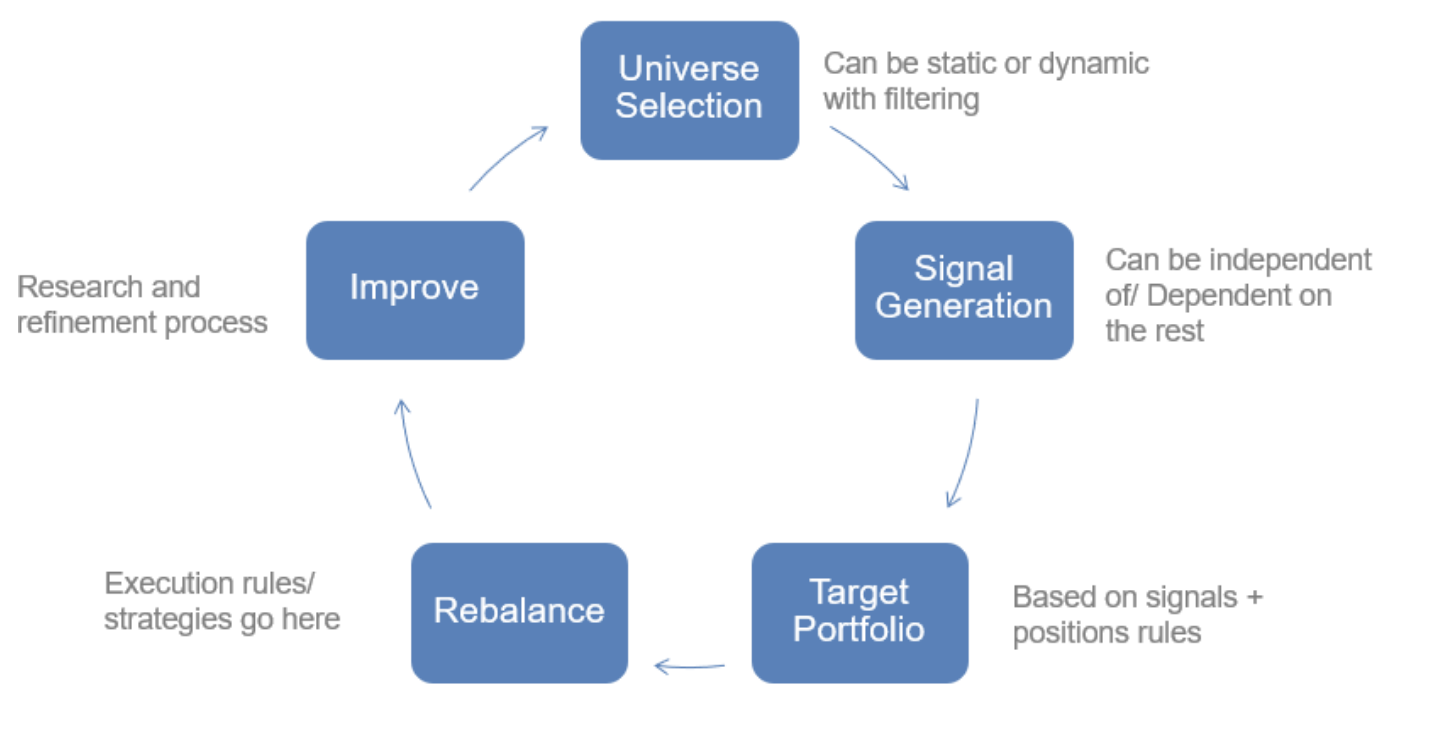

The steps consist of the following:

- **Selecting universe**: This is the set of trading instruments that we observe for opportunities. This is usually static (e.g. futures of the index) or systematically defined (e.g. all stocks in S&P500). It also depends on other factors like geographies, regulations, fund size, liquidity requirements, investment mandates etc.

- **Signal generation**: This is the step where we continuously observe and compute a quantitative metric on all instruments in our universe. It can be a technical indicator like RSI, or a factor like momentum or combinations of many such metrics. This defines our potential trading intentions for each of these instruments.

- **Target portfolio generation**: Based on the step above, and taking in to account our current portfolio and other constraints, we come up with a target position for each instruments (including 0). This is the portfolio we want in our current strategy iteration.

- **Rebalancing**: This is the step where we translate our target portfolio to actual orders and positions. All order sizing functions, execution strategies etc. sit here.

- **Improvement**: Finally, we look at the results of the current iteration and improve our strategy in this continuous cycle.

### Systematic strategy design pillars
The major pillars of a systematic strategy development are defining strategy inputs, designing the trading rules, validating the trading rules, portfolio (meta strategy) design and risk management.

**Inputs**: Input to the strategies can come in many flavours like
- Price/ returns and it’s transformation. Most of the common technical indicators are transformation of price returns2
- Positioning information – volumes and open interest data and participant-wise positioning data if available
- Fundamental information –macro-economic information, company fundamentals
- Non-market information: Example twitter sentiments, analysts’ ratings etc.

**Trading Rules/ Logic**: Can be either based on trader’s hypothesis or inferred (learned) from data
- Form hypothesis (e.g. moving average cross-over signals change in trends) and test – traditional approach
- Feed data to infer rules (the subject matter of machine learning and artificial intelligence)

**Back-testing and Forward-testing**: A crucial step and often over-looked step.
- A good platform to guard against biases : data-mining bias, survivorship bias, market-impact modeling, look-ahead bias
- Should be flexible, event-driven (to avoid look-ahead bias) and with built-in analytics

**Portfolio Creation/ Optimization**: Never go all-in with a single strategy
- Two strategies better than one – if they are uncorrelated (in terms of signals and/ or performance)
- Various methods exists – ensemble, traditional portfolio theory, dynamic portfolio allocation etc.

### Risk management in systematic strategy
Risk management is an integral part of systematic strategies and plays an important role in each part above. It starts with the inputs. One of biggest issues quant strategies are quality of input data. The input data quality and timeliness are fundamental in building a solid and stable strategy. 

Second, during the research phase, the major risks are [various human conginitive biases](https://en.wikipedia.org/wiki/List_of_cognitive_biases) (that leads to selective research and biased outcome) and experimental biases (e.g. [data-mining](https://en.wikipedia.org/wiki/Data_mining) and [overfitting](https://en.wikipedia.org/wiki/Overfitting)).

One of the major biases during the backtest phase, which happens to be very frequent among beginners, is the [look ahead bias](https://www.investopedia.com/terms/l/lookaheadbias.asp). An event-driven backtesting engine becomes a crucial tool to handle such cases.

Once the strategy is tested and deployed, the risk management switches to controlling the inputs (data quality) and outputs (orders, positions etc.) of the strategy. The key parameters to control are:

- **trading frequency** - how frequently the algorithm is trading vs. expectation. A rogue strategy sending orders too fast is known as machine gunning.
- **trading amount** - how large the individual generated orders are, compared to expectation. This avoids the fat-finger problem.
- **restrictions** - several restrictions can be implemented based on requirements, that keep the strategy under control. This includes restriction on maximum leverage, maximum exposure, maximum position size, maximum number of orders in a given period of time and many others
- **kill switch** - finally, a systematic strategy should always be built with a kill switch, that enables us to quickly stop the execution in case things go wrong or the strategy behaves unexpectedly.
